<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df= pd.read_csv('/content/rock_density_xray.csv')

In [44]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [45]:
df.columns=['Signal','Density']

In [46]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


<Axes: xlabel='Signal', ylabel='Density'>

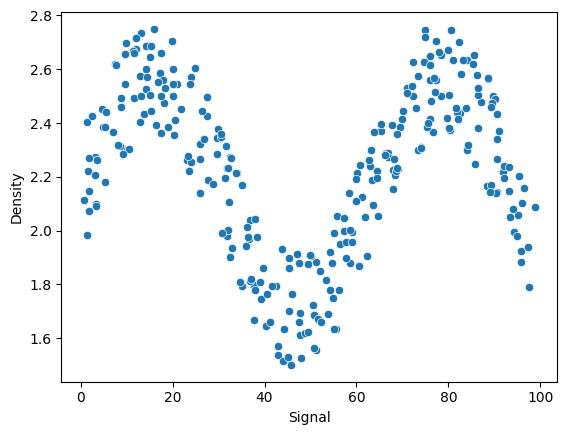

In [47]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [48]:
# check if it will be at linear regression model

X=df['Signal'].values.reshape(-1,1) # if your data has singal feature

In [49]:
y=df['Density']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr_model=LinearRegression()

In [54]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [55]:
lr_pred=lr_model.predict(X_test)

In [56]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

In [59]:
mean_squared_error(y_test,lr_pred)

0.06605167265148638

In [60]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2570051996584629

In [67]:
# plot of linear prediction

In [64]:
signal_range=np.arange(0,100)

In [65]:
signal_pred=lr_model.predict(signal_range.reshape(-1,1))

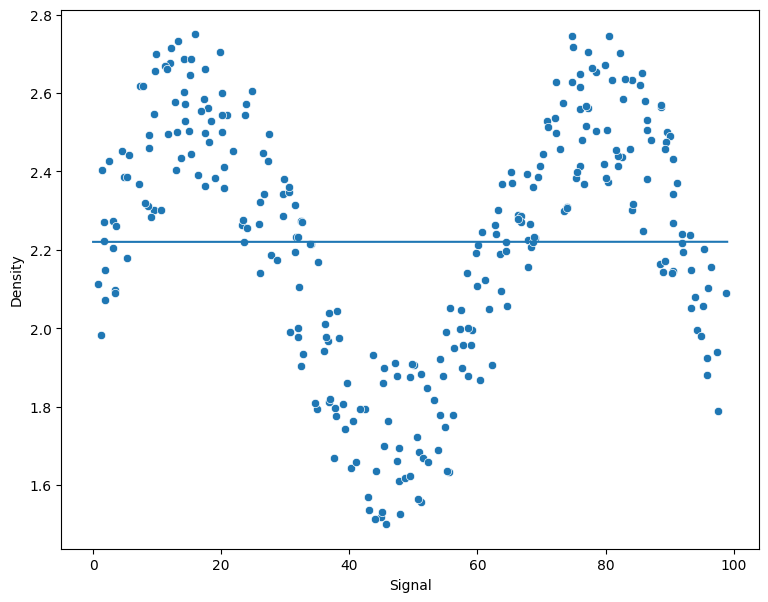

In [66]:
plt.figure(figsize=(9,7),dpi=100)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_pred)

so linear will not be helpful

***now use polynomial regression***

make a function for all model so dont have to work individually

In [68]:
def run_model(model,X_train,y_train,X_test,y_test):

  # fit the model
  model.fit(X_train,y_train)

  # get metrics
  preds =model.predict(X_test)

  mae=mean_absolute_error(y_test,preds)

  mse=mean_squared_error(y_test,preds)

  rmse=np.sqrt(mean_squared_error(y_test,preds))

  print(f'MAE : {mae}')
  print(f'MSE : {mse}')
  print(f'RMSE:{rmse}')

  # plot result on signal range
  signal_range=np.arange(0,100)
  signal_pred=model.predict(signal_range.reshape(-1,1))

  plt.figure(figsize=(9,7),dpi=100)
  sns.scatterplot(x='Signal',y='Density',data=df,color='black')

  plt.plot(signal_range,signal_pred)




MAE : 0.211198973318633
MSE : 0.06605167265148638
RMSE:0.2570051996584629


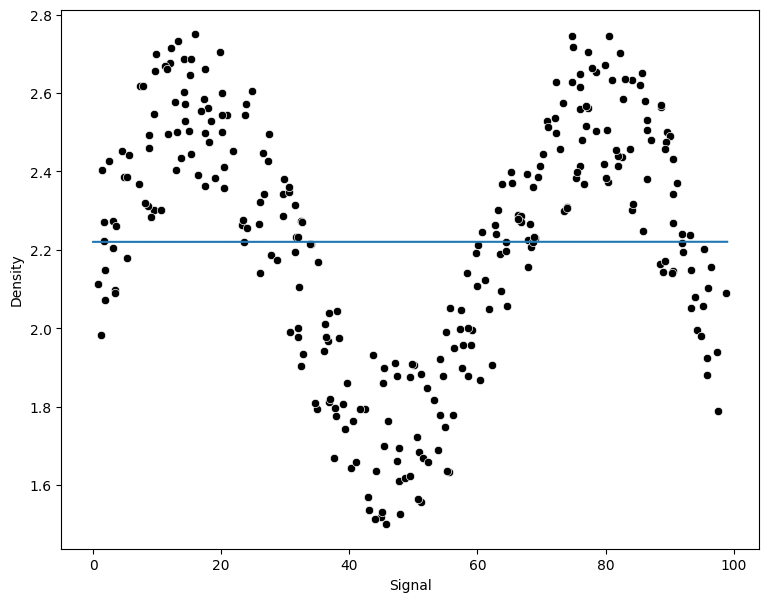

In [70]:
model= LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [71]:
# pipeline for polynomial model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [78]:
pipe =make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE : 0.11969122389483997
MSE : 0.019064564958231823
RMSE:0.13807449061369673


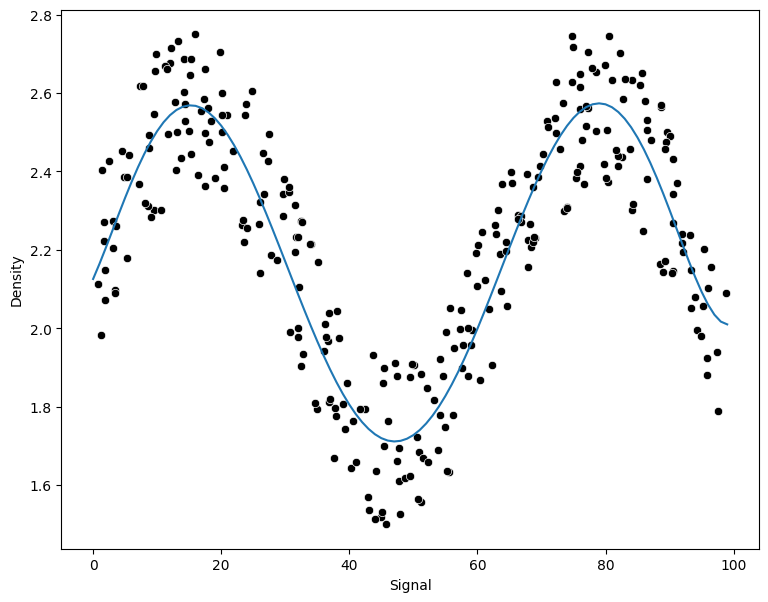

In [79]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [80]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
MSE : 0.023210127264201276
RMSE:0.1523487028635337
MAE : 0.12198383614100558
MSE : 0.01885317110339715
RMSE:0.13730685016923647
MAE : 0.11635971693292672
MSE : 0.017630145285948105
RMSE:0.13277855732740926


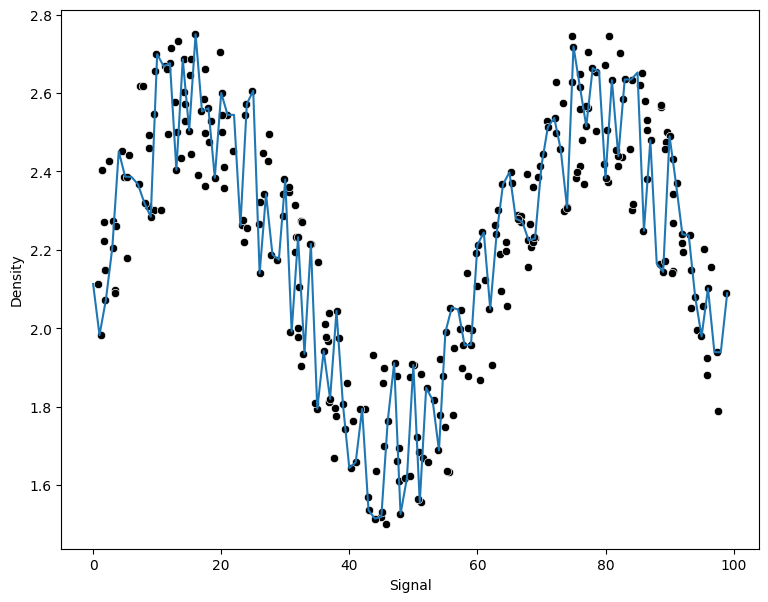

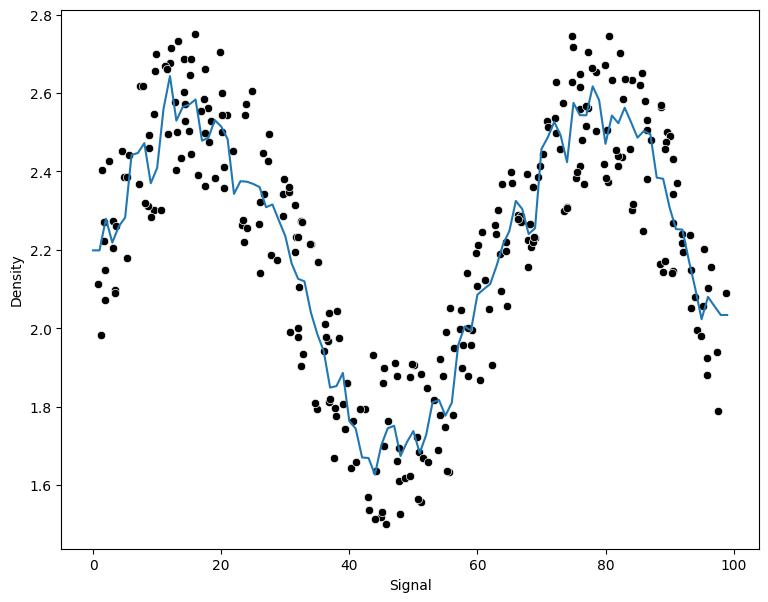

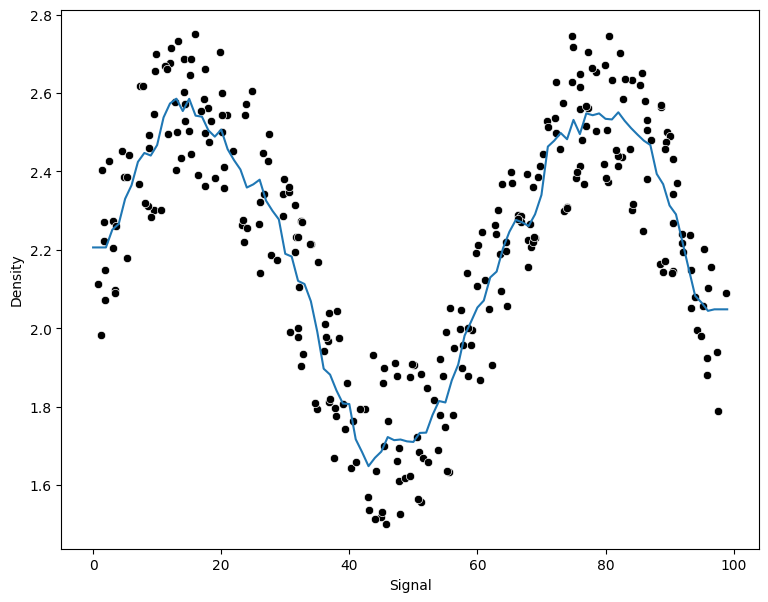

In [82]:
k_values=[1,5,10]
for n in k_values:
  model=KNeighborsRegressor(n_neighbors=n)
  run_model(model,X_train,y_train,X_test,y_test)

In [83]:
# decision tree

from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
MSE : 0.023210127264201276
RMSE:0.1523487028635337


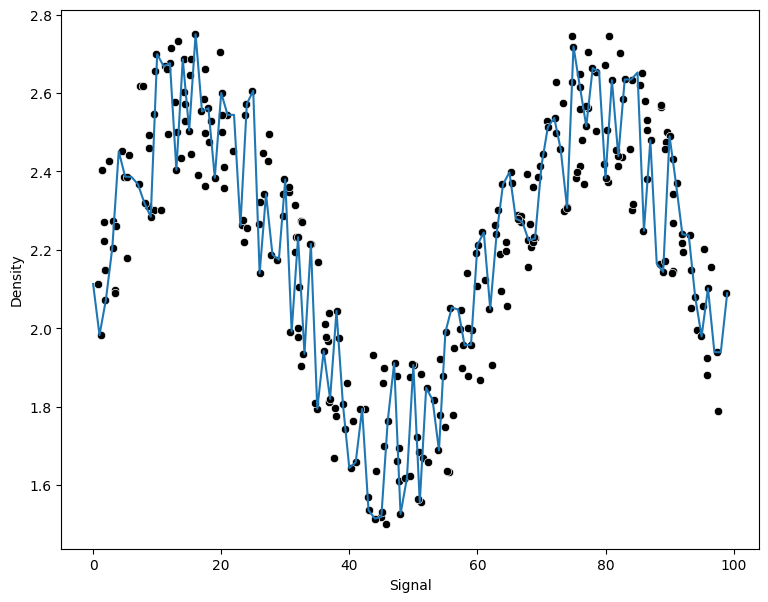

In [85]:
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [87]:
# svm
from sklearn.svm import SVR

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
svr=SVR()

param_grid={'C':[0.01,0.1,1,5,10,100,1000],
            'gamma':['auto','scale']}

grid=GridSearchCV(svr,param_grid)

In [91]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

MAE : 0.10854210121349125
MSE : 0.01599465913459914
RMSE:0.12646999302047557


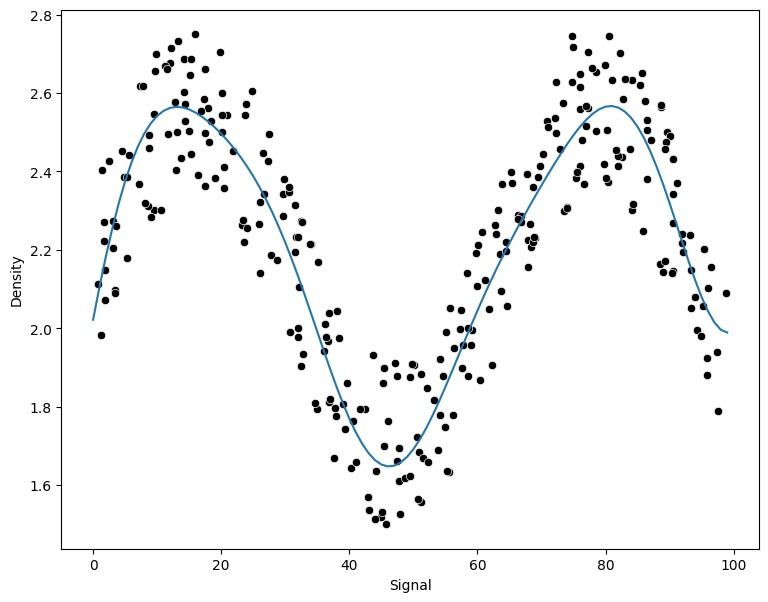

In [90]:
run_model(grid,X_train,y_train,X_test,y_test)

In [92]:
# random forest
from sklearn.ensemble import RandomForestRegressor

In [93]:
rfr=RandomForestRegressor(n_estimators=10)

MAE : 0.11244910024533036
MSE : 0.020188969082630612
RMSE:0.1420878921042557


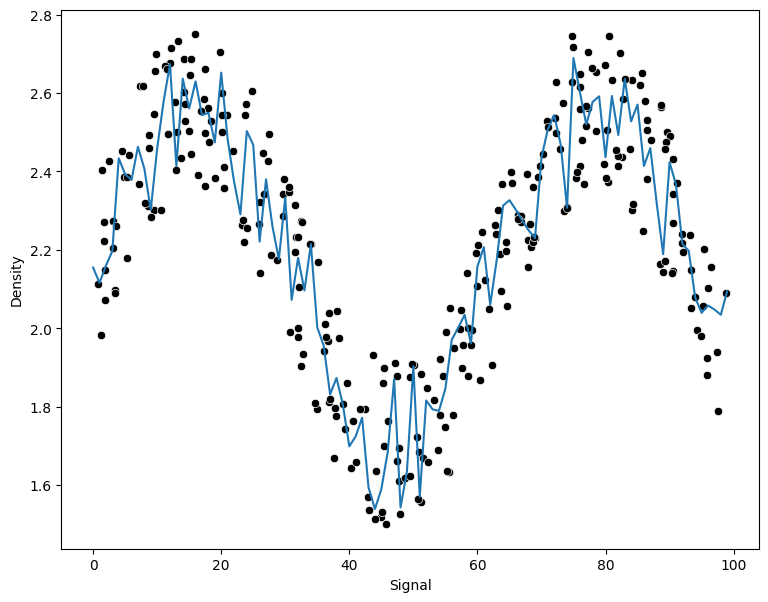

In [94]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [95]:
 # boosting just for the sake of it

 from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [100]:
gre_boo=GradientBoostingRegressor()

MAE : 0.11318284854800689
MSE : 0.01767343883172538
RMSE:0.13294148649584667


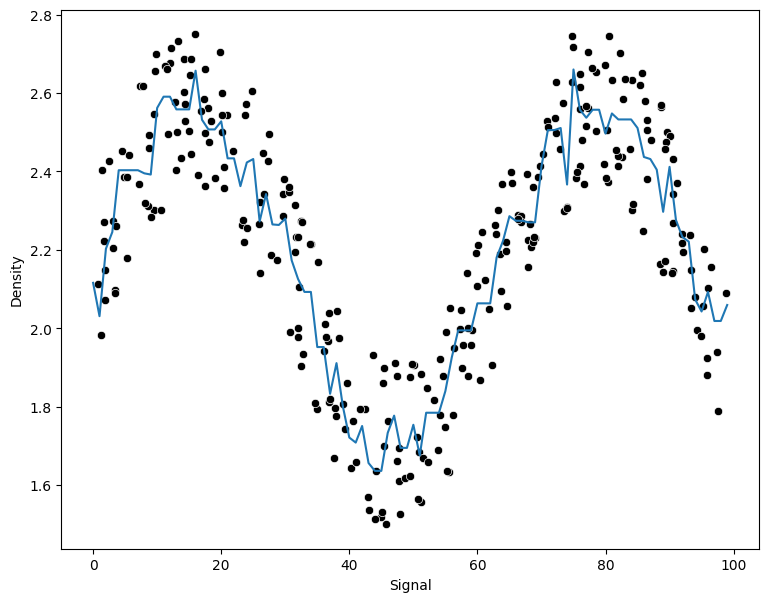

In [101]:
run_model(gre_boo,X_train,y_train,X_test,y_test)

In [102]:
ada_boo=AdaBoostRegressor()

MAE : 0.12036724457065304
MSE : 0.019514009421030525
RMSE:0.13969255320535354


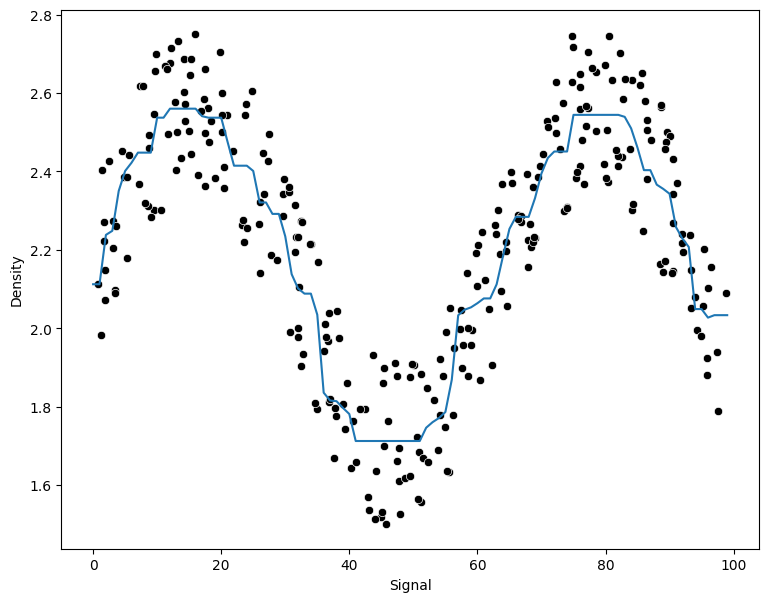

In [103]:
run_model(ada_boo,X_train,y_train,X_test,y_test)